14B12785 藤森慶一郎

In [1]:
#問１
def calc(n):
    res = 0
    for i in range(n):
        for j in range(i):
            res+=j
    return res
#オーダーはn^2

In [2]:
import time

def timeck(n):
    t1 = time.time()
    calc(n)
    t2 = time.time()
    etime = t2-t1
    return etime

In [3]:
import scipy.optimize
import matplotlib.pyplot as plt
%matplotlib inline
l = []
m = [0,1,2,3,4,5,6,7,8,9,10]
for n in range(11):
    l.append(timeck(1000*n))
    n +=1

a = 0.0209900087944
b = -0.000948987531727
c = -0.00553432711575


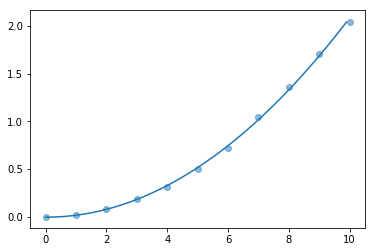

In [4]:
import numpy as np

def func(x,a,b,c):
    return a*x**2 + b*x + c

result,covariance=scipy.optimize.curve_fit(func,m,l)
print('a =', result[0])
print('b =', result[1])
print('c =', result[2])
x = np.arange(0, 10, 0.1)
y = (result[0] * x **2) + (result[1] * x) + result[2]
plt.scatter(m, l, alpha=0.5)
plt.plot(x,y)

In [5]:
#問２（最短距離）

from collections import deque
import urllib.request
url = 'http://yambi.jp/lecture/advanced_programming2018/maze3.txt'
urllib.request.urlretrieve(url, 'maze3.txt')

f = open('maze3.txt','r')
field = [list(l.rstrip()) for l in f]
f.close()

w = len(field[0])
h = len(field)
for i in range(h):
    for j in range(w):
        if field[i][j]=='S': s=(i,j)
        if field[i][j]=='G': g=(i,j)
            
prev = {}
dist = {}
queue = deque([(s,'start',0)])
while len(queue)>0:
    v, p, d = queue.popleft()
    if v in dist: continue
    (x,y)=v
    if (0<=x<w) and (0<=y<h) and field[x][y]!='#':
        dist[v] = d
        prev[v] = p
        for (dx,dy) in [(1,0),(-1,0),(0,1),(0,-1)]:
            queue.append(((x+dx,y+dy),v,d+1))
dist[g]

216

In [6]:
#問2(到達可能なマス数)
prev = {}
def dfs(v,p):
    if v in prev: return
    (x,y)=v
    if (0<=x<w) and (0<=y<h) and field[x][y]!='#':
        prev[v]=p
        for (dx,dy) in [(1,0),(-1,0),(0,1),(0,-1)]:
            dfs((x+dx,y+dy),v)
dfs(s,'start')

In [14]:
import collections
c = collections.Counter(prev)
len(c)

6279

In [13]:
prev

{(0, 0): 'start',
 (0, 1): (0, 0),
 (0, 2): (0, 1),
 (0, 3): (0, 2),
 (1, 3): (0, 3),
 (2, 3): (1, 3),
 (3, 3): (2, 3),
 (4, 3): (3, 3),
 (5, 3): (4, 3),
 (6, 3): (5, 3),
 (7, 3): (6, 3),
 (7, 4): (7, 3),
 (8, 4): (7, 4),
 (8, 5): (8, 4),
 (9, 5): (8, 5),
 (10, 5): (9, 5),
 (10, 6): (10, 5),
 (11, 6): (10, 6),
 (12, 6): (11, 6),
 (13, 6): (12, 6),
 (13, 7): (13, 6),
 (12, 7): (13, 7),
 (12, 8): (12, 7),
 (13, 8): (12, 8),
 (14, 8): (13, 8),
 (14, 9): (14, 8),
 (13, 9): (14, 9),
 (12, 9): (13, 9),
 (11, 9): (12, 9),
 (10, 9): (11, 9),
 (9, 9): (10, 9),
 (8, 9): (9, 9),
 (7, 9): (8, 9),
 (6, 9): (7, 9),
 (6, 10): (6, 9),
 (5, 10): (6, 10),
 (4, 10): (5, 10),
 (4, 9): (4, 10),
 (3, 9): (4, 9),
 (2, 9): (3, 9),
 (1, 9): (2, 9),
 (1, 8): (1, 9),
 (0, 8): (1, 8),
 (1, 7): (1, 8),
 (2, 7): (1, 7),
 (2, 6): (2, 7),
 (3, 6): (2, 6),
 (3, 5): (3, 6),
 (4, 5): (3, 5),
 (5, 5): (4, 5),
 (5, 4): (5, 5),
 (4, 4): (5, 4),
 (3, 4): (4, 4),
 (2, 5): (3, 5),
 (2, 10): (2, 9),
 (3, 8): (3, 9),
 (4, 8): (